From Google Doc:

1. Plot a sersic profile with n = 1,2,3,4 normalized to have the same intensity at the effective radius and the same effective radius.

2. Plot a sersic profile with n=1, but with a different Re, and all normalized to have the same intensity at the effective radius.

3. For both of the above examples, integrate the total luminosity out a finalradius extending from R/Re=0.1 to R/Re=10. When doing the integral, remember that you are NOT integrating the 1D profile, but integrating a 2D disk, whose 1D radial profile is thesersic profile. For each of the cases above, make a plot of L(<R/Re)/Ltot vs. R/Re.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from astropy.table import Table
from astropy.wcs import WCS

from astropy.io import fits
from astropy.table import Table
from astropy.io import ascii

In [118]:
homedir = os.getenv("HOME")
tab = ascii.read(homedir+"/github/WISE_test/testest2_plots.txt")
tab

xc,xc_err,yc,yc_err,mag,mag_err,re,re_err,nsersic,nsrsic_err,BA,BA_err,PA,PA_err,sky,sky_err,error,chi2nu,prefix,success_flag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64
175.3109,0.0111,174.8707,0.0189,4.8494,0.0011,17.237,0.0234,0.3845,0.0013,0.4705,0.0006,30.7007,0.0672,-5.0654,0.9446,0.0,3.4527,VFID0388-NGC6015,1
180.2237,0.0114,179.2617,0.0093,6.4258,0.0152,11.0092,0.2344,2.458,0.0328,0.9349,0.0071,-13.1859,4.4584,-62.2269,1.141,0.0,1.0938,VFID0484-NGC3945,1
168.6167,0.0087,169.1971,0.0075,6.6111,0.0087,7.4944,0.0924,1.9954,0.0186,0.8314,0.0047,87.1794,1.112,-11.8236,0.9699,0.0,1.2262,VFID0525-NGC5322,1
170.5771,0.0154,170.4544,0.012,6.5457,0.0134,9.9726,0.1871,2.016,0.0268,0.7574,0.0062,-87.4048,1.0849,-17.2861,1.2849,0.0,1.4051,VFID0547-NGC2768,1
338.7939,0.0066,337.7264,0.0143,3.394,0.0004,38.0683,0.0214,0.6033,0.0007,0.0965,0.0,-24.7751,0.004,11.9695,0.5393,1.0,2.0628,VFID0934-NGC5907,1
189.5989,0.0079,190.6553,0.0055,5.4851,0.0013,8.4349,0.0154,0.777,0.0028,0.3261,0.0005,-54.4628,0.0439,3.7732,0.918,0.0,1.7804,VFID0974-NGC5866,1
263.8745,0.0028,262.3273,0.0116,3.3039,0.0009,17.7386,0.0227,0.9567,0.003,0.2024,0.0002,-11.9891,0.0154,12.082,1.6175,0.0,4.9164,VFID0983-NGC3079,1
213.6396,0.1069,213.3482,0.059,4.943,0.0045,38.0128,0.1017,0.0915,0.002,0.5439,0.0018,68.6517,0.1861,21.7311,1.2065,0.0,1.8424,VFID1169-MESSIER109,1
197.6238,0.0193,193.3163,0.0457,4.0849,0.0016,31.1593,0.0444,0.2512,0.0011,0.4238,0.0007,12.7613,0.0632,25.1176,1.3942,0.0,2.0217,VFID1215-NGC3953,1


## An attempt to generate a corner plot featuring sersic_n, $R_e$, and magnitude:

In [119]:
import corner

In [120]:
dawtaw = np.array([tab['nsersic'],tab['re'],tab['mag']])

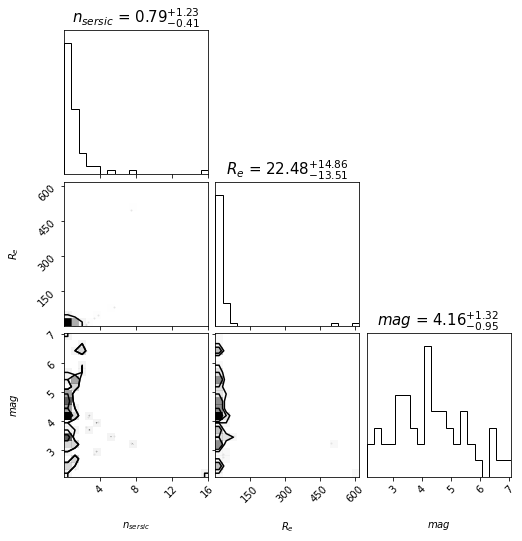

In [129]:
figure = corner.corner(dawtaw.T,labels=[r'$n_{sersic}$', r'$R_e$', r'$mag$'],show_titles=True,
                      title_kwargs={"fontsize":15})

In [122]:
print(xs.T.shape)

(59, 3)


In [125]:
xs.T

array([[ 3.845000e-01,  1.723700e+01,  4.849400e+00],
       [ 2.458000e+00,  1.100920e+01,  6.425800e+00],
       [ 1.995400e+00,  7.494400e+00,  6.611100e+00],
       [ 2.016000e+00,  9.972600e+00,  6.545700e+00],
       [ 6.033000e-01,  3.806830e+01,  3.394000e+00],
       [ 7.770000e-01,  8.434900e+00,  5.485100e+00],
       [ 9.567000e-01,  1.773860e+01,  3.303900e+00],
       [ 9.150000e-02,  3.801280e+01,  4.943000e+00],
       [ 2.512000e-01,  3.115930e+01,  4.084900e+00],
       [ 2.976000e-01,  3.673710e+01,  4.129500e+00],
       [ 3.865000e-01,  1.950090e+01,  3.315200e+00],
       [ 5.432000e-01,  2.237030e+01,  3.487700e+00],
       [ 3.117000e-01,  2.248200e+01,  4.325300e+00],
       [ 1.176000e+00,  2.399090e+01,  4.132600e+00],
       [ 6.279000e-01,  2.151980e+01,  3.856200e+00],
       [ 2.689000e-01,  2.723670e+01,  4.628200e+00],
       [ 3.879600e+00,  4.847550e+01,  3.987800e+00],
       [ 1.605260e+01,  6.202860e+02,  2.094500e+00],
       [ 4.710000e-01,  1.70